In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import os

path = '/kaggle/input/titanic/'

titanic_df = pd.read_csv(os.path.join(path, 'train.csv'))

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. 본문에서 언급된 feature를 제외하고 유의미한 feature를 1개 이상 찾아보자.

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1.Name

In [6]:
titanic_df['Name'][:10]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [7]:
titanic_df['Name'][-10:]

881                          Markun, Mr. Johann
882                Dahlberg, Miss. Gerda Ulrika
883               Banfield, Mr. Frederick James
884                      Sutehall, Mr. Henry Jr
885        Rice, Mrs. William (Margaret Norton)
886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, dtype: object

* 이름에서 Mr, Mrs, Master,Miss 등의 칭호가 보인다. 이는 Pclass와 연관이 있어보이고 이 Pclass는 Survived와 어느정도 상관관계가 있다고 볼 수 있으므로 Name feature의 칭호 또한 이와 연관이 있을것 같다.

In [14]:
titanic_df['Title'] = titanic_df['Name'].str.extract('([\w]+)\.', expand=False)

In [15]:
titanic_df['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [16]:
titanic_df['Title'].isnull().sum()

0

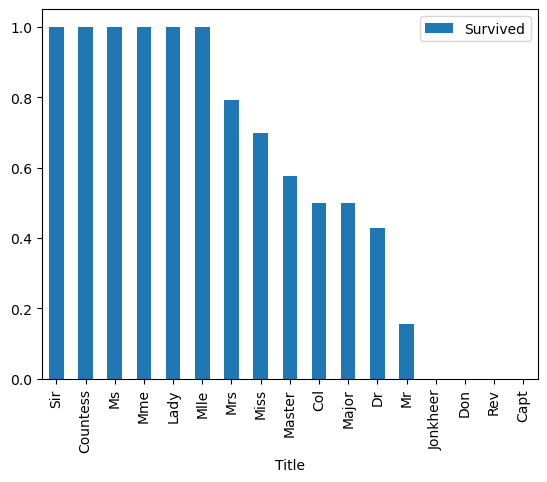

In [36]:
ax = titanic_df[['Title', 'Survived']].groupby(by='Title').mean().sort_values(by='Survived', ascending=False).plot.bar()

* 확실히 호칭별에 따라 생존률에 차이가 있엇다.
* 특히 Countess, Ms, Mme, Lady, Mlle, Mrs, Miss 등 지위가 높은 여성의 경우 생존률이 굉장히 높아 보인다.
* title이 Null인 값은 없었다. 즉 생존률이 0인 jognkheer, Don, Rev 등의 Pclass는 굉장히 낮을 것으로 추측된다.

In [46]:
titanic_df[(titanic_df['Title'] == 'Jonkheer') | (titanic_df['Title'] == 'Don') | (titanic_df['Title'] == 'Rev') | (titanic_df['Title'] == 'Capt')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Don
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S,Rev
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,Rev
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S,Rev
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q,Rev
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,Capt
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,Jonkheer
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S,Rev
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev


* 생존률이 0이고 호칭이 각각 Jonkheer, Don, Rev, Capt인 경우 단 하나의 예외도 없이 전부 남자인 점이 놀라운것 같다.

---

## 2.Sibsp, Parch

* 이 두가지 변수는 하나로 묶어 생각하는게 좋다는 생각이 들었다.
* 왜냐하면 가족구성원의 수이기 때문에 세세하게 들어가면 다른 결과가 나올수도 있지만 두 컬럼의 값을 합친후 새로운 변수를 만들어 Survived와 관련이 있을지 살펴보도록 하자.

In [47]:
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']

titanic_df['Family']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family, Length: 891, dtype: int64

In [48]:
titanic_df['Family'].describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [51]:
titanic_df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [52]:
titanic_df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

* 가족관계 구성원이 없는 사람이 대부분이다. 즉 혼자 탓냐 아니면 누군가와 같이 함께 승선했느냐의 여부가 생존률과 상관관계가 있을수 있을것 같다.
* 만약 Family 칼럼의 값이 0이라면 혼자탄 경우 이므로 이 경우를 1로 해서 새로운 칼럼을 만들어 보자.

In [55]:
titanic_df['Alone'] = [1 if i > 0 else 0 for i in titanic_df['Family']]

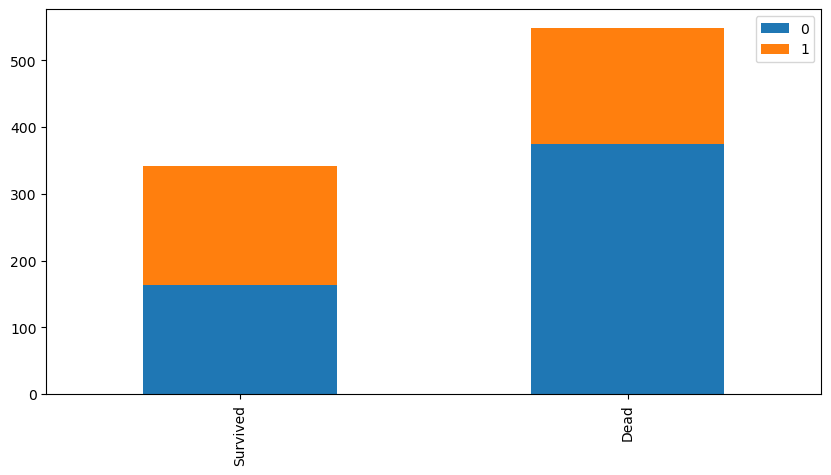

In [59]:
survived = titanic_df[titanic_df['Survived'] == 1]['Alone'].value_counts()
dead = titanic_df[titanic_df['Survived'] == 0]['Alone'].value_counts()
alone_df = pd.DataFrame([survived, dead])
alone_df.index=['Survived', 'Dead']
alone_df.plot(kind='bar', stacked=True, figsize=(10,5))
plt.show()

* 사망한 케이스에 한하여 혼자 탄 사람이 아닌 사람들에 비해 더 많이 죽은것을 확인할 수 있었다.

---

## 3. Embarked

In [62]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

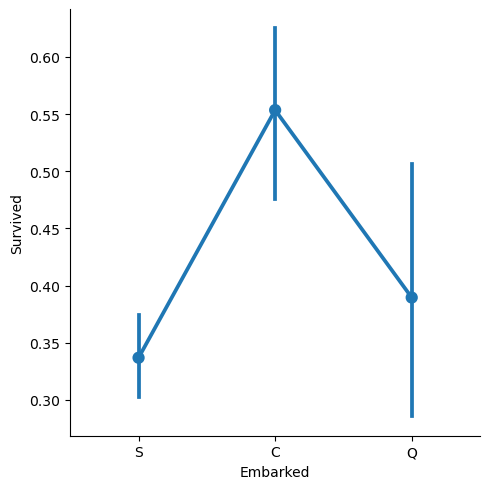

In [63]:
sns.catplot(x='Embarked', y='Survived', data=titanic_df, kind='point')
plt.show()

* 승선항구도 생존률과 어느정도 영향이 있어보인다. 혹시 특정항구에서 지위가 높은 사람이 많이 탓거나 아니면 혹은 성별과 관계가 있을까?

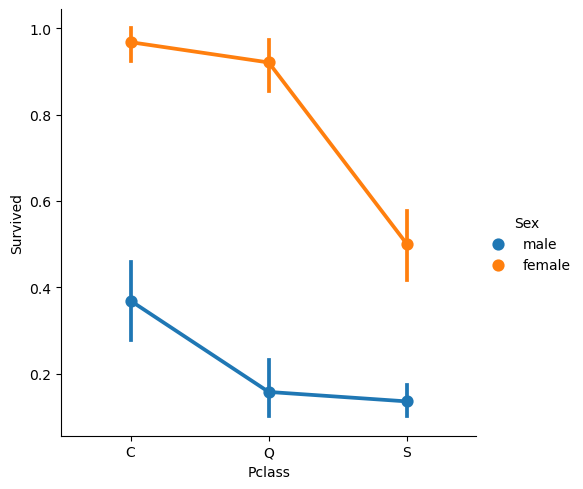

In [74]:
g = sns.catplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df, kind='point')
g.set_xticklabels(["C", "Q", "S"])
plt.show()

In [71]:
titanic_df[(titanic_df['Embarked'] == 'S') & (titanic_df['Sex'] == 'female')]['Survived'].mean()

0.6896551724137931

In [72]:
titanic_df[(titanic_df['Embarked'] == 'Q') & (titanic_df['Sex'] == 'female')]['Survived'].mean()

0.75

In [73]:
titanic_df[(titanic_df['Embarked'] == 'C') & (titanic_df['Sex'] == 'female')]['Survived'].mean()

0.8767123287671232

In [75]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

* Embarked가 S인 경우가 가장 많은데 생존률은 가장 떨어진다. 심지어 여성인 경우여도 마찬가지다.

---

## 4.Fare

<AxesSubplot:ylabel='Density'>

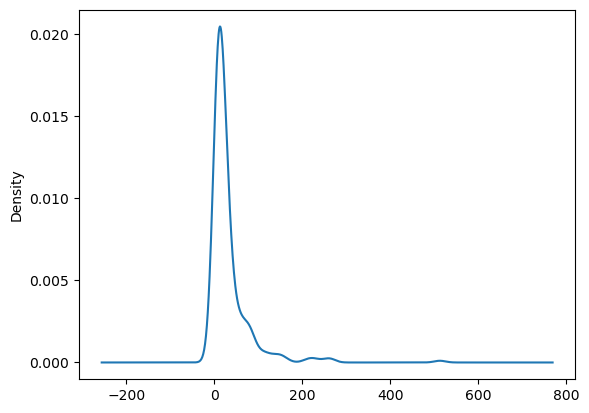

In [78]:
titanic_df['Fare'].plot(kind='kde')

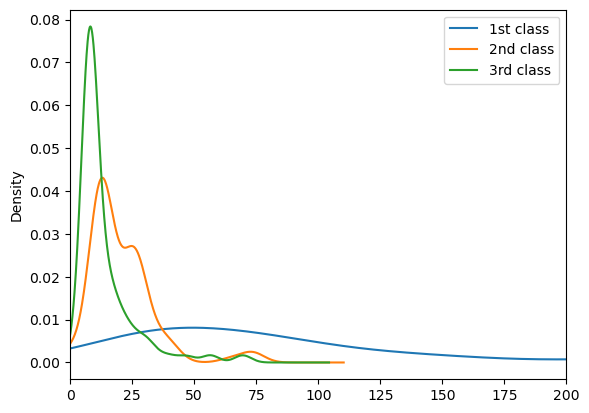

In [82]:
titanic_df['Fare'][titanic_df.Pclass==1].plot(kind='kde')
titanic_df['Fare'][titanic_df.Pclass==2].plot(kind='kde')
titanic_df['Fare'][titanic_df.Pclass==3].plot(kind='kde')

plt.legend(['1st class', '2nd class','3rd class'])
plt.xlim(0,200)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6:

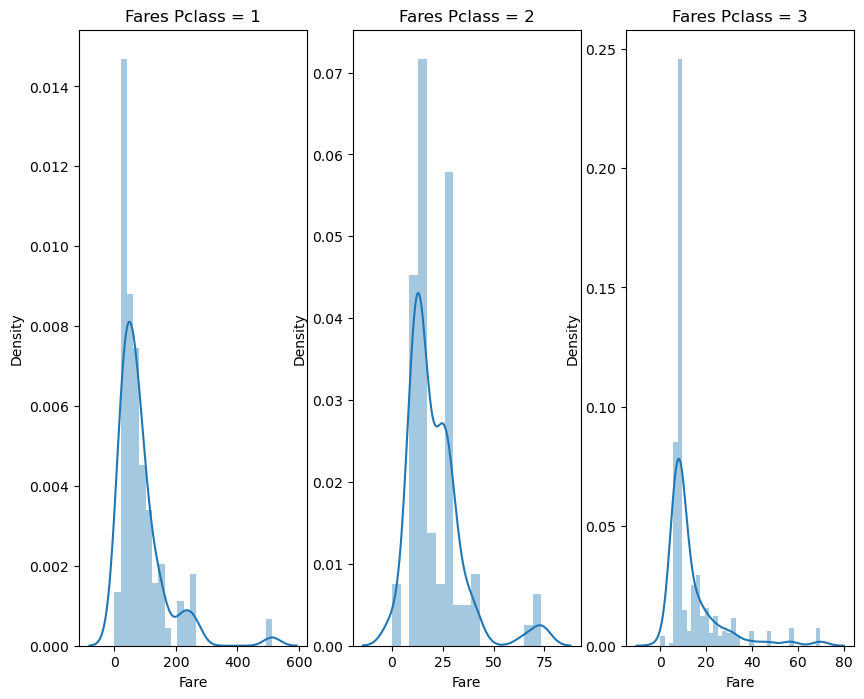

In [83]:
f,ax=plt.subplots(1,3,figsize=(10,8))
sns.distplot(titanic_df[titanic_df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares Pclass = 1')
sns.distplot(titanic_df[titanic_df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares Pclass = 2')
sns.distplot(titanic_df[titanic_df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares Pclass = 3')
plt.show()

* Pclass 별 요금 분포의 차이가 커보인다.